<a href="https://colab.research.google.com/github/DimaKav/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
# Load into pandas dataframe

import pandas as pd
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data',
                  header=None)

# Validate for appropriate number of observations

df.columns = ['A' + str(i) for i in range(1,17)]
print(df.shape)

# Replace ? with NaNs

df = df.replace('?', np.NaN)
print(df.isnull().sum())

# Change continuous numeric features to float

df[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']] = df[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']].astype('float')

df.info()

(690, 16)
A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null float64
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null float64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null float64
A15    690 non-null float64
A16    690 non-null object
dtypes: float64(6), object(10)
memory usage: 86.3+ KB


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
# Explore relationships between continuous features 

print(df.corr())

# Change + - 1 for approved 0 for rejected

df[['A16']] = df[['A16']].replace('+', 1)
df[['A16']] = df[['A16']].replace('-', 0)

# Make the corr method work for A1, A9, A10, A12 
# by chaging to b=0, a=1, t=1, f=0 to see more correlations easily

df[['A9', 'A10', 'A12']] = df[['A9', 'A10', 'A12']].replace('t', 1)
df[['A9', 'A10', 'A12']] = df[['A9', 'A10', 'A12']].replace('f', 0)
df[['A1']] = df[['A1']].replace('a', 1)
df[['A1']] = df[['A1']].replace('b', 0)

# Pearson correlation shows us a strong correlation for Credit approval 
# A16 is correlated 70% with A9 and 45% with A10

           A1        A2        A3        A8        A9       A10       A11  \
A1   1.000000 -0.036677  0.038022 -0.090829  0.017928  0.074452  0.019762   
A2  -0.036677  1.000000  0.202317  0.395751  0.206151  0.084307  0.185912   
A3   0.038022  0.202317  1.000000  0.298902  0.244317  0.174846  0.271207   
A8  -0.090829  0.395751  0.298902  1.000000  0.345689  0.222982  0.322330   
A9   0.017928  0.206151  0.244317  0.345689  1.000000  0.432032  0.379532   
A10  0.074452  0.084307  0.174846  0.222982  0.432032  1.000000  0.571498   
A11  0.019762  0.185912  0.271207  0.322330  0.379532  0.571498  1.000000   
A12 -0.053308  0.055282 -0.013023  0.138139  0.091276  0.017043  0.006944   
A14 -0.079228 -0.079812 -0.224242 -0.077163 -0.068072 -0.053772 -0.120096   
A15  0.000288  0.018553  0.123121  0.051345  0.090012  0.077652  0.063692   
A16  0.024634  0.162881  0.206294  0.322475  0.720407  0.458301  0.406410   

          A12       A14       A15       A16  
A1  -0.053308 -0.079228  0.00

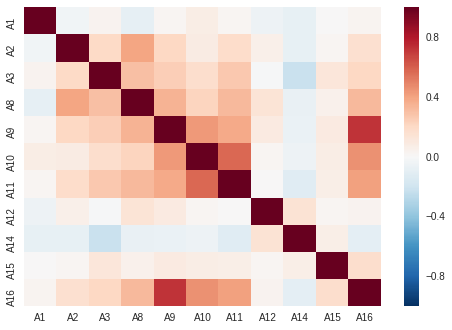

In [0]:
# Visualize the correlations

import seaborn as sns

corr = df.corr()

sns.heatmap(corr);

In [0]:
# Hypothesis tests

# Run t-tests on continuous features

# Separate approved and not approved so we can use them in the t-test function

import scipy

df_approved = df[df['A16'] == 1].drop(['A16'], axis=1)
df_rejected = df[df['A16'] == 0].drop(['A16'], axis=1)

# Check population variances to see whether to do a regular or Welch's t-test

t_features = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']

for i in t_features:
  print(df[i].var())
  
# Welch's it is

for a, r in zip(df_approved[t_features], df_rejected[t_features]):
  print('\n' + r + ':\n', 
        scipy.stats.ttest_ind(df_approved[a], df_rejected[r], 
                                                equal_var=False, nan_policy='omit'))

142.99047552755303
24.78210932900024
11.199151663827017
23.648185776487665
30208.79268090169
27145169.084840517

A2:
 Ttest_indResult(statistic=4.224490929851236, pvalue=2.7673850124552034e-05)

A3:
 Ttest_indResult(statistic=5.392530906223675, pvalue=1.0158807568737146e-07)

A8:
 Ttest_indResult(statistic=8.38006008674286, pvalue=7.425348666782441e-16)

A11:
 Ttest_indResult(statistic=10.6384190682749, pvalue=4.310254123415665e-23)

A14:
 Ttest_indResult(statistic=-2.6696493137915973, pvalue=0.0077778250827957)

A15:
 Ttest_indResult(statistic=4.196600236397611, pvalue=3.5433798702024966e-05)


In [0]:
# Cross tabs for Chi

# The only valid features for Chi: A9 A10 A12

ct_9 = pd.crosstab(df['A16'], df['A9'])
ct_10 = pd.crosstab(df['A16'], df['A10'])
ct_12 = pd.crosstab(df['A16'], df['A12'])

# Many of the expected frequencies are < 5, so the Chi results
# for features other than A9, A10, A12 cannot be trusted

# Run chi tests on valid features

for ct in [ct_9, ct_10, ct_12]:
  print(scipy.stats.chi2_contingency(ct))

(355.2038167412799, 3.1185900878457007e-79, 1, array([[182.61884058, 200.38115942],
       [146.38115942, 160.61884058]]))
(143.06956205083148, 5.6757273745274924e-33, 1, array([[219.25362319, 163.74637681],
       [175.74637681, 131.25362319]]))
(0.568273300792113, 0.45094587758631943, 1, array([[207.59710145, 175.40289855],
       [166.40289855, 140.59710145]]))


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

* Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?

  **The p-values for all of the continuous features were less than 0.05. This means that we can reject the null hypothesis of equal averages.** 


* Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?

  **An often quoted guideline for the validity of this calculation is that the test should be used only if the observed and expected frequencies in each cell are at least 5. The first few chi-squared tests I ran had many observed frequencies that were less than 5, so I found the only three features that are valid (A9, A10, A12) and performed tests on them as I did not have enough time to implement Fisher's exact test to overcome that problem.**

  **The chi-squared p-values for A9 and A10 were < 0.05 which means that we can reject the null hypothesis for these features. For A11, the p-value was much greater than 0.05 which means there is a statistically significant relationship between A11 and getting approved for credit.**
  

* What was the most challenging part of this sprint challenge?

     **Timing**